In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

<div style="background-color: #CDF3A2; color:#ED8E7C;">
    <h1><center>Introduction</center></h1>
</div>

<div style="background-color: #CDF3A2">
    <center><img src="https://raw.githubusercontent.com/jaykumar1607/Water-Quality/main/water_sanitation.gif"></center>
</div>

According to WHO, infectious diseases caused by lack of water and unsanitary living environment cause **01 infant death** every minute. The bad thing is that the world's clean water is gradually running out.

The reality is that **almost 70%** of the earth's surface is covered with water, but only 2.5% of that water is pure water suitable for consumption. Therefore, water is an important resource that we need to preserve first.
With about 2 billion tons of waste entering water sources every day, people still face the challenge of water pollution around the world.

According to the United Nations report, up to 2.2 billion people are living without clean water, while those without access to basic sanitation amount to 4.2 billion people.
It is forecasted that by 2030, about 60 countries will experience severe water shortage. Annual; 3.6 million people die from diseases caused by polluted water.
According to the World Bank, in the not too distant future, clean water can be a factor causing political instability, armed conflict or reducing economic growth, poverty, and disease.

***Source: City Children’s Hospital, Ho Chi Minh City***

With the **Water Quality** data set, I will learn what factors determine the safety of drinking water, as well as a Machine learning application that predicts whether a sample of water is drinkable or not.

<hr>

In [ ]:
df = pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
df.sample(5)

In [ ]:
print('Number of rows:', df.shape[0])

In [ ]:
print('Number of features:', df.shape[1])

We have **3276 samples** and **09 features**:

* **ph**: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

* **Hardness**: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

* **Solids**: Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

* **Chloramines**: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

* **Sulfate**: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

* **Conductivity**: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

* **Trihalomethanes**: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

* **Organic_carbon**: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

* **Turbidity**: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

* **Potability**: Indicates if water is safe for human consumption where **1** means **Potable** and **0** means **Not potable**.

<div style="background-color: #CDF3A2; color:#ED8E7C;">
    <h1><center>EDA</center></h1>
</div>

In [ ]:
df.info()

In [ ]:
df.describe()

All features have values in valid range.

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Potability')
plt.show()

In [ ]:
df['Potability'].value_counts() / df.shape[0] * 100

Dataset have target with rate **61**:**39** (**Not Potabilty** : **Potability**). Slightly imbalance.

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(y=df.isna().sum().index, x=df.isna().sum().values / len(df) * 100)
plt.title('Missing data')
plt.xlabel('Missing values (%)')
plt.ylabel('Features')
plt.show()

* Feature **ph** has 15% missing values
* Feature **Sulfate** has 24% missing values
* Feature **Trihalomethanes** has 5% missing values

**Attention**: before dive deeper dataset, we must split dataset into training-set and test-set. This is to ensure that, after we have created the predictive model, there is a metric against which to evaluate the model objectively.

In [ ]:
train, test = train_test_split(
    df, stratify=df['Potability'],
    random_state=42
)

In [ ]:
def plot_hist(col):
    plt.figure(figsize=(12, 8))
    sns.histplot(data=train, x=col, hue='Potability')
    plt.show()

In [ ]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [ ]:
for col in features:
    plot_hist(col)

It can be seen that this dataset is quite difficult, when the features of the target all have the same distribution.

In [ ]:
plt.figure(figsize=(12, 8))
mask = np.zeros_like(train[features].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train[features].corr(), annot=True, cmap='viridis', fmt='.2f', mask=mask)
plt.show()

The correlation between the features in the water.

<div style="background-color: #CDF3A2; color:#ED8E7C;">
    <h1><center>Model</center></h1>
</div>

## 1. Baseline Model

Above we have separated training-set and test-set, testset will be meaningful as future data, so we need one more metric, evaluate the model during training, hyperparameters tuning, It's valid-set! 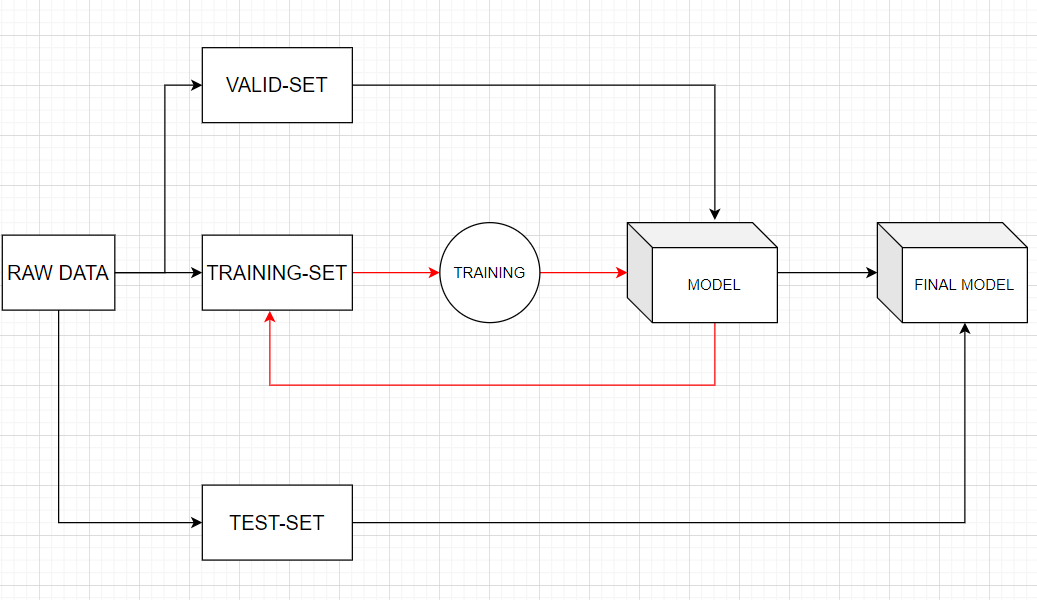

In [ ]:
X = train.copy()
y = X.pop('Potability')

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, stratify=y,
    random_state=42
)

I will use Logistic Regression algorithm in sciki-learn library. However, to use it, we need to remove, or fill in, missing values.

Furthermore, for easy convergence, we need to rescale the values.

Therefore, there are 2 steps here:
* **fill in missing value with median of these feature**
* **rescale to standard distribution**

Algorithm hyperparameters is be default, we will improve later.

In [ ]:
# fill in missing value and rescale for training set

baseline_imputer = SimpleImputer(strategy='median')
baseline_scaler = StandardScaler()

X_train = baseline_imputer.fit_transform(X_train)
X_train = baseline_scaler.fit_transform(X_train)

In [ ]:
# fill in missing value and rescale for valid set

X_valid = baseline_imputer.transform(X_valid)
X_valid = baseline_scaler.transform(X_valid)

In [ ]:
# baseline model (Logistic Regression algorithm)

baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

In [ ]:
# Predict

y_pred = baseline_model.predict(X_valid)

In [ ]:
# Evaluate

print(f'Accuracy: {accuracy_score(y_valid, y_pred) * 100:.2f}%')

Unexpectedly, when the data set is quite difficult, our prediction model is only close to 61% accurate. To improve accuracy, we will need to analyze, do further processing, or use other more powerful algorithms.

In [ ]:
sns.heatmap(confusion_matrix(y_valid, y_pred, normalize='true'), annot=True, fmt='.2f', cmap='viridis')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_valid, y_pred))

In [ ]:
yhat = baseline_model.predict_proba(X_valid)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_valid, yhat)
# plot the roc curve for the model
plt.figure(figsize=(12, 8))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Model can't detect class '1'.

<hr>

Evaluate model on training-set.

In [ ]:
print(f'Train Accuracy: {accuracy_score(y_train, baseline_model.predict(X_train)) * 100:.2f}%')

We can see that,
* Training Error = 38.71%
* Validation Error = 39.19%
We have **bias** is **38.71%**, **variance is 0.48%**. So the model is **underfitting**.

To solve this problem, we need to:

* Increase samples with class '1'
* Increase the number of features
* Adjust hyperparameters
* Use more complex algorithms or models
* Increase training time, number of epochs

It's not possible to collect more data for me, so I'll apply the remaining steps.

## Increase the number of features

I will use PolynomialFeatures() to increase the number of features by combining them to form new features of higher order. Specifically, here is 3.

In [ ]:
poly = PolynomialFeatures(3)
X_train = poly.fit_transform(X_train)
X_valid = poly.fit_transform(X_valid)

In [ ]:
print(f'Number of features: {X_train.shape[1]}')

After increasing the number of features with PolynomialFeatures(), from 9 features we will have 220 features.

In [ ]:
inc_features_model = LogisticRegression(solver='liblinear')
inc_features_model.fit(X_train, y_train)
y_pred = inc_features_model.predict(X_valid)
print(f'Training Set Accuracy: {accuracy_score(y_train, inc_features_model.predict(X_train)) * 100:.2f}%')
print(f'Valid Set Accuracy: {accuracy_score(y_valid, y_pred) * 100:.2f}%')

Due to the large number of features, we need to adjust the regularization parameter, here is the "C" parameter. By default in sciki-learn library, LogisticRegression has C=1, we will reduce it by 1 to reduce the impact of features, here is 0.05.

In [ ]:
inc_features_model = LogisticRegression(solver='liblinear', C=0.05)
inc_features_model.fit(X_train, y_train)
y_pred = inc_features_model.predict(X_valid)
print(f'Training Set Accuracy: {accuracy_score(y_train, inc_features_model.predict(X_train)) * 100:.2f}%')
print(f'Valid Set Accuracy: {accuracy_score(y_valid, y_pred) * 100:.2f}%')

In addition to data processing, the choice of hyperparameters is also important. But with a large number of hyperparameters, we need a method that can automatically find them.

I use optuna to tuning hypterparameters. You guy can use RandomizedSearchCV in scikit-learn.

In [ ]:
import optuna

In [ ]:
# Turn off optuna verbose
# optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
def score_dataset(X_train, X_valid, y_train, y_valid, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    return score

**Logistic Regression Tuning Hyperparameters**

In [ ]:
def objective(trial):
    logistic_params = dict(
        penalty=trial.suggest_categorical('penalty', ['l1', 'l2']),
        C=trial.suggest_float('C', 1e-6, 1e1),
        warm_start=trial.suggest_categorical('warm_start', [True, False]),
    )
    logistic = LogisticRegression(**logistic_params, solver='liblinear')
    return score_dataset(X_train, X_valid, y_train, y_valid, logistic)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
logistic_params = study.best_params

In [ ]:
print('Best hyperparameters found!')
print(logistic_params)

In [ ]:
tuning_model = LogisticRegression(**logistic_params, solver='liblinear')
tuning_model.fit(X_train, y_train)
y_pred = tuning_model.predict(X_valid)
print(f'Training Set Accuracy: {accuracy_score(y_train, tuning_model.predict(X_train)) * 100:.2f}%')
print(f'Valid Set Accuracy: {accuracy_score(y_valid, y_pred) * 100:.2f}%')

Compared to baseline, accuracy has **increased by 8.30%**.

In [ ]:
sns.heatmap(confusion_matrix(y_valid, y_pred, normalize='true'), annot=True, fmt='.2f', cmap='viridis')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(classification_report(y_valid, y_pred))

In [ ]:
yhat = tuning_model.predict_proba(X_valid)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_valid, yhat)
# plot the roc curve for the model
plt.figure(figsize=(12, 8))
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

***To be continue...***